<a href="https://colab.research.google.com/github/jjy12163/picchat/blob/main/%ED%91%9C%EC%A0%95%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 4.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=7885c4119b18feff45b197b6bdaeb614d4cba8b706607f32e94ee837412d69bc
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


24-07-06 07:29:22 - Directory /root/.deepface created
24-07-06 07:29:22 - Directory /root/.deepface/weights created


Saving tears.jpg to tears.jpg


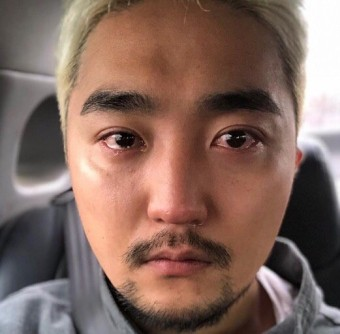

24-07-06 07:29:59 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 75.3MB/s]


Detected emotions: {'angry': 0.06057844148017466, 'disgust': 1.72434280187872e-06, 'fear': 3.0132584273815155, 'happy': 0.005917217640671879, 'sad': 2.991103008389473, 'surprise': 0.0015648323824279942, 'neutral': 93.92757415771484}


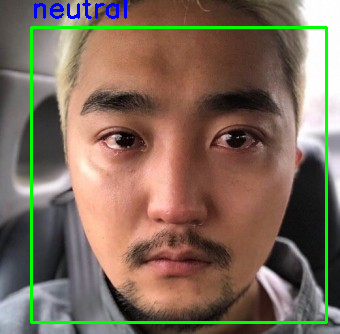

In [ ]:
from deepface import DeepFace
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# 이미지 업로드
uploaded = files.upload()

# 업로드된 파일 이름 가져오기
file_name = list(uploaded.keys())[0]

# 이미지 읽기
img = cv2.imread(file_name)

# 이미지가 제대로 읽혔는지 확인
if img is None:
    print("Error: Unable to read the image.")
else:
    # 이미지 표시
    cv2_imshow(img)

    # 감정 분석 수행
    results = DeepFace.analyze(img, actions=['emotion'])

    # 분석 결과 표시
    for result in results:
        print("Detected emotions:", result["emotion"])
        dominant_emotion = result["dominant_emotion"]

        # 인식된 얼굴 주위에 사각형 그리기 및 감정 표시
        (x, y, w, h) = result["region"]["x"], result["region"]["y"], result["region"]["w"], result["region"]["h"]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, f"{dominant_emotion}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # 감정 분석 결과 이미지 표시
    cv2_imshow(img)
